In [1]:
file_name = "another_configuration_mappnig_test.ipynb"
import sys
import os
sys.path.insert(0, os.path.abspath(
    os.path.join(os.path.dirname(file_name), '../../src/') ))

from configuration_space_mapping import *
from utils import *

import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np

# Creatin the function that creates the normals dataframe

In [2]:
client_id = connect_2_sim()
test_connection(client_id)

Connected to remote API server
Number of objects in the scene:  42


In [3]:
scene_objects = ['Cuboid_0','Cuboid_1','Cuboid_2',
                 'Cuboid_3','Cuboid_4','./dr20']
robot_name = './dr20'

In [4]:
listazinha = get_scene_objects_info(client_id, scene_objects)
info_list, robot_information = split_robot_from_info_list(listazinha,robot_name)

In [5]:
inverted_normals_robot, global_coordin_corners_robot = get_robot_info_for_mapping(client_id,robot_name,robot_information=robot_information)

points bounding box around robot: [array([-1.87688596,  1.61742038, -0.017019  ]), array([-1.87687982,  1.84288903, -0.0170243 ]), array([-2.17380678,  1.84289713, -0.01642804]), array([-2.17381292,  1.61742848, -0.01642274])]
normals bounding box around robot: [6.2830909689202645, 1.5707019885356788, 3.141498315330679, 4.712294642125265]
inverted normals bounding box around robot: [3.141498315330471, 4.712294642125472, 6.2830909689204715, 1.5707019885354716]
 


In [6]:
expected_robot_corners = np.array([[-1.88,  1.62],
                                   [-1.88,  1.84],
                                   [-2.17,  1.84],
                                   [-2.17,  1.62]])
expected_robot_inverted_normals = np.array([3.14, 4.71, 6.28, 1.57])                                   
assert (np.round(global_coordin_corners_robot,2)[:,:2] == expected_robot_corners).all()
assert (np.round(inverted_normals_robot,2) == expected_robot_inverted_normals).all

In [7]:
# OBSTACLE STUFF, FOR 1 OBSTACLE ONLY
# I need to retrieve the global coordinates and normals of an obstacle. Let's suppose the Cuboid_0 for this test

cuboid_number = 0
normals_cuboid, global_coordinates_cuboid = get_obstacle_info_for_mapping(client_id,cuboid_number,info_list)


points bounding box around cuboid0: [array([-1.47499979e+00,  5.00000358e-01,  6.03388139e-08]), array([-1.97499979e+00,  5.00000358e-01,  6.05279031e-08]), array([-1.97499979e+00,  3.58456582e-07,  5.88704756e-08]), array([-1.47499979e+00,  3.58456582e-07,  5.86813864e-08])]
normals bounding box around cuboid0: [1.570796330109855, 3.1415926569048547, 4.712388983699855, 3.314855057112709e-09]


In [8]:
expect_obstacle_normals = np.array([1.57, 3.14, 4.71, 0.  ])
expected_obstacle_corners = np.array([[-1.47,  0.5 ],
                                      [-1.97,  0.5 ],
                                      [-1.97,  0.  ],
                                      [-1.47,  0.  ]])
assert (np.round(normals_cuboid,2)==expect_obstacle_normals).all()                                      
assert (np.round(global_coordinates_cuboid, 2)[:,:2] == expected_obstacle_corners).all()

In [30]:
dframe_normals = get_normals_dataframe(inverted_normals_robot, normals_cuboid)
#dframe_normals.reindex([0,1,2,3,4,5,6,7])

 
        normals  normal_order owner
7  3.314855e-09             4     o
3  1.570702e+00             4     r
4  1.570796e+00             1     o
0  3.141498e+00             1     r
5  3.141593e+00             2     o
1  4.712295e+00             2     r
6  4.712389e+00             3     o
2  6.283091e+00             3     r
 


,normals,normal_order,owner
0,3.141498e+00,1,r
1,4.712295e+00,2,r
2,6.283091e+00,3,r
3,1.570702e+00,4,r
4,1.570796e+00,1,o
5,3.141593e+00,2,o
6,4.712389e+00,3,o
7,3.314855e-09,4,o


In [21]:
data_0 = {'normals':[3.314855e-09, 1.570702e+00, 1.570796e+00, 3.141498e+00, 3.141593e+00, 4.712295e+00, 4.712389e+00, 6.283091e+00], 
        'normal_order':[4,4,1,1,2,2,3,3],
        'owner':['o','r','o','r','o','r','o','r']}
dframe_0 = pd.DataFrame.from_dict(data_0)   
dframe_0

,normals,normal_order,owner
0,3.314855e-09,4,o
1,1.570702e+00,4,r
2,1.570796e+00,1,o
3,3.141498e+00,1,r
4,3.141593e+00,2,o
5,4.712295e+00,2,r
6,4.712389e+00,3,o
7,6.283091e+00,3,r


In [23]:
a_0 = mapping_loop(dframe=dframe_0,
                 corners_robot=global_coordin_corners_robot,
                 corners_obstacle=global_coordinates_cuboid)
a_0_np = np.array(a_0)

o -> r | b4-a4
r -> o | b1-a4
o -> r | b1-a1
r -> o | b2-a1
o -> r | b2-a2
r -> o | b3-a2
o -> r | b3-a3
r -> o | b4-a3


In [31]:
alpha = mapping_loop(dframe=dframe_normals.reindex([0,1,2,3,4,5,6,7]),
                     corners_robot=global_coordin_corners_robot,
                     corners_obstacle=global_coordinates_cuboid)
alpha_np = np.array(alpha)

o -> r | b4-a1
r -> o | b2-a4
o -> r | b2-a4
r -> o | b3-a2


# Testing the Mapping function

In [10]:
client_id = connect_2_sim()
test_connection(client_id)

Connected to remote API server
Number of objects in the scene:  42


In [11]:
scene_objects = ['Cuboid_0','Cuboid_1','Cuboid_2',
                 'Cuboid_3','Cuboid_4','./dr20']
robot_name = './dr20'
lista_de_vertices = mapping(client_id=client_id, scene_objects=scene_objects, robot_name=robot_name)

points bounding box around robot: [array([-1.87685087,  1.61820479, -0.01701949]), array([-1.87682592,  1.84367344, -0.01702409]), array([-2.17375112,  1.84370632, -0.01642973]), array([-2.17377607,  1.61823767, -0.01642513])]
normals bounding box around robot: [6.283061643435035, 1.5706726630504493, 3.1414689898454493, 4.7122653166400355]
inverted normals bounding box around robot: [3.1414689898452415, 4.712265316640242, 6.283061643435242, 1.5706726630502421]
 
points bounding box around cuboid0: [array([-1.47499979e+00,  5.00000359e-01,  6.06977947e-08]), array([-1.97499979e+00,  5.00000359e-01,  6.05020497e-08]), array([-1.97499979e+00,  3.58623146e-07,  5.85114949e-08]), array([-1.47499979e+00,  3.58623146e-07,  5.87072398e-08])]
normals bounding box around cuboid0: [1.5707963307761097, 3.1415926575711093, 4.712388984366109, 3.981109664152882e-09]
 
        normals  normal_order owner
7  3.981110e-09             4     o
3  1.570673e+00             4     r
4  1.570796e+00           

In [12]:
v_list_np = np.array(lista_de_vertices)

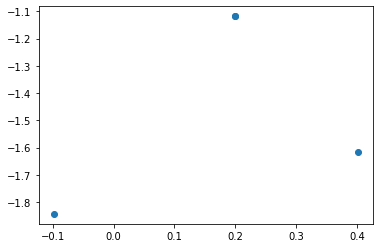

In [13]:
plt.scatter(v_list_np[:,0], v_list_np[:,1])

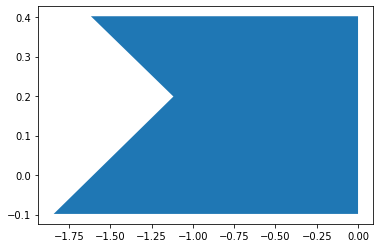

In [14]:
plt.fill_betweenx(v_list_np[:,0],v_list_np[:,1])

# Debugging `mapping_loop()`

## These parameters were found during a test I did in 6th Jun

In [15]:
global_coordinates_cuboid = [np.array([-1.47499979e+00,  5.00000360e-01,  6.24157246e-08]), 
                             np.array([-1.97499979e+00,  5.00000360e-01,  6.17008973e-08]), 
                             np.array([-1.97499979e+00,  3.60081535e-07,  5.67935650e-08]), 
                             np.array([-1.47499979e+00,  3.60081535e-07,  5.75083923e-08])]
global_coordin_corners_robot = [np.array([-1.8764059 ,  1.62417155, -0.01703672]), 
                                np.array([-1.87667144,  1.84963994, -0.01704005]), 
                                np.array([-2.17359744,  1.84929024, -0.01644217]), 
                                np.array([-2.1733319 ,  1.62382185, -0.01643884])]

data = {'normals':[9.814665e-09,1.117424e-03,1.570796e+00,1.571914e+00,3.141593e+00,3.142710e+00,4.712389e+00,4.713506e+00], 
        'normal_order':[4,3,1,4,2,1,3,2],
        'owner':['o','r','o','r','o','r','o','r']}

dframe = pd.DataFrame.from_dict(data)                                

In [16]:
a = mapping_loop(dframe=dframe,
                 corners_robot=global_coordin_corners_robot,
                 corners_obstacle=global_coordinates_cuboid)
a_np = np.array(a)

o -> r | b4-a3
r -> o | b1-a3
o -> r | b1-a4
r -> o | b2-a4
o -> r | b2-a1
r -> o | b3-a1
o -> r | b3-a2
r -> o | b4-a2


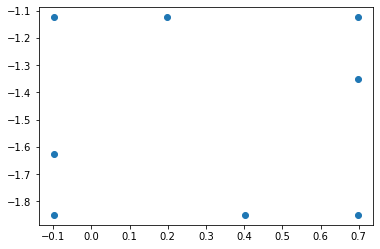

In [17]:
plt.scatter(a_np[:,0],a_np[:,1])

## These parameters were found during a test I did in 7th Jun

In [18]:
data_2 = {'normals':[4.056378e-09, 1.570740e+00,1.570796e+00,3.141537e+00, 3.141593e+00,4.712333e+00, 4.712389e+00, 6.283129e+00], 
        'normal_order':[4,4,1,1,2,2,3,3],
        'owner':['o','r','o','r','o','r','o','r']}
dframe_2 = pd.DataFrame.from_dict(data_2)   
a_2 = mapping_loop(dframe=dframe_2, corners_robot=global_coordin_corners_robot, corners_obstacle=global_coordinates_cuboid)
a_2_np = np.array(a_2)

o -> r | b4-a4
r -> o | b1-a4
o -> r | b1-a1
r -> o | b2-a1
o -> r | b2-a2
r -> o | b3-a2
o -> r | b3-a3
r -> o | b4-a3


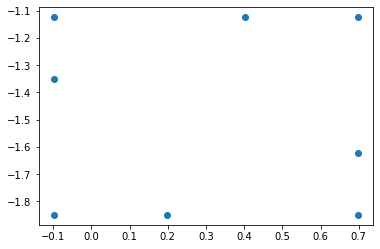

In [19]:
plt.scatter(a_2_np[:,0],a_2_np[:,1]) 
# the noise does not change the shape of the polygon, only some positions of colinear vertices